<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Synthetic Data Creation
1. `import numpy as np`: Imports the NumPy library, commonly used for numerical computations in python, and assigns it the alias `np` for convenience.

2. `import pandas as pd`: Imports the pandas library, which is widely used for data manipulation and analysis in Python, and assigns it the alias `pd` for ease of use.

3. `from sklearn.datasets import make_classification`: Imports the `make_classification` function from the `sklearn.datasets` module. This function is used to generate synthetic classification datasets for machine learning experiments.

4. `X, y =make_classification(...)`:

  `X`: A NumPy array containing the feature matrix, where each row is a sample and each column is a feature.

  `y`: A NumPy array containing the target labels (o or 1 in this case) for the classification task.

  `make_classification` parameters:

    `n_samples=1000`: Generates 1000 samples

    `n_feature=5`: Each sample will have 5 features.

    `n_informative`: Out of the 5 features, 3 will be informative (i.e., contribute to determining the target labels).

    `n_redudant=1`: Adds 1 redudant feature, which is a linear combination of the informative features.

    `n_clusters_per_class=1`: Ensures that each class is represented by a single cluster.

    `flip_y=0.01`: Adds noise by flipping 1% of the target lables randomly.

    `random_state=42`: Sets the random seed for reproducibility of results.

5. `columns=[f'Feature_{i+1}' for i in range(X.shape[1])]`: Creates a list of columns for the feature matrix `X`. `f'Feature_{i+1}'` uses and f-string to dynamically generate column names as `Feature_1`, `Feature_2`..., upto `Feature_5`.

`X.shape[1]`: returns the number of features in `X` (5 in this case). The resulting `columns` list is `['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']`.

6. `data=pd.DataFrame(X, columns=columns)`: Converts the feature matrix `X` into a pandas DataFrame with column names specified by the `columns` list. This makes it easier to manipulate and analyze the data.

7. `data['Target']=y`: Adds a new column named `Target` to the `data` DataFrame, assigning the target labels (`y`) to it.

8. `data.head()`: Displays the first 5 rows of the `data` DataFrame. This is a quick way to inspect the structure and content of the dataset.




In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

X, y=make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_redundant=1,
    n_clusters_per_class=1,
    flip_y=0.01,
    random_state=42
)

columns=[f'Feature_{i+1}' for i in range(X.shape[1])]
data=pd.DataFrame(X, columns=columns)
data['Target']=y

data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,0.481210,0.269386,1.496879,1.651237,1.075099,1
1,0.311062,0.780386,-1.451478,1.723465,-0.874689,0
2,-1.092120,-1.140347,0.258995,0.898648,-0.474031,0
3,0.111132,1.171272,-0.322178,-1.970000,-1.173218,0
4,0.252584,0.629103,0.927478,0.743902,0.107253,1


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1la2beA1L5nUacHTR4s2a8ZUqHBr4yhFS7uwFUaSj5KY#gid=0


## Import Libraries

1. `from sklearn.model_selection import train_test_split`: Imports the ` train_test_split` function from the `sklearn.model_selection` module. This function is used to split the dataset into training and testing subsets, which are essential for evaluating the performance of machine learning models.

2. `from sklearn.linear_model import LogisticRegression`: Imports the `LogisticRegression` class from the `sklearn.linear_model` module. This is a machine learning model used for binary or multi-class classification tasks. Logistic regression predicts probabilities of classes and assigns the class with the highest probability to each data point.

3. `from sklearn.preprocessing import StandardScaler`: Imports the `StandardScaler` class from the `sklearn.preprocessing` module. This is used to standardize features by removing the mean and scaling them to unit variance. Standardization often improves the performance of models, especially when features have different scales.

4. `from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score`: Imports several evaluation metrics from the `sklearn.metrics` module:

  `classification_report`: Generates a rport showing precision, recalll, F1-Score and support for each class.

  `confusion_matrix`: Computes a matrix showing the counts of true positive, true negative, false positive, and false negative predictions.

  `roc_auc_score`: Calculates the Area Under the Curve (AUC) score for the Receiver Operating Characteristic (ROC) curve, which measures the model's ability to distinguish between classes.

5. ` import matplotlib.pyplot as plt`: Imports the `pyplot` module from the Matplotib library and assigns it the alias `plt`. This module is used to create visualizations like plots and charts, including ROC curves.

6.`from sklearn.metrics import roc_curve`: Imports the `roc_curve` function from the `sklearn.metrics` module. This function computes the false positive rate, true positive rate and thresholds for plotting the ROC curve, which illustrates the performance of a classification model across different thresholds.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [ ]:
X=data.drop('Target', axis=1)
y=data['Target']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
model=LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred=model.predict(X_test_scaled)
y_pred_prob=model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
coef_df=pd.DataFrame({
    'Feature': X.columns,
    'Coefficient':model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("Model Coefficients:")
print(coef_df)
print("\nClassification report:")
print(classification_report(y_test, y_pred))

Model Coefficients:
     Feature  Coefficient
2  Feature_3     3.492248
4  Feature_5     0.499757
3  Feature_4     0.102741
1  Feature_2    -0.058565
0  Feature_1    -1.511737

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        93
           1       0.94      0.97      0.95       107

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [ ]:
fpr, tpr, _=roc_curve(y_test, y_pred_prob)
auc=roc_auc_score(y_test, y_pred_prob)

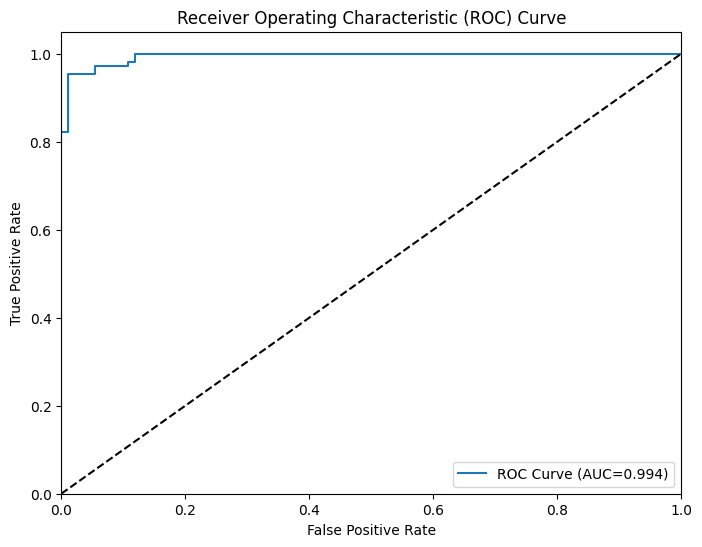

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={auc:.3f})')
plt.plot([0,1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 86   7]
 [  3 104]]
